In [224]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

#loadmat
from scipy.io import loadmat

# Math
import numpy as np
from scipy.fftpack import fft, dct
from scipy import signal
from scipy.stats import norm,multivariate_normal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

#math
import math

%matplotlib inline

# Frame the problem

this is a simple multi-class recognition problem for recognizing the speaker

# 1. Import data

In [2]:
audio_path = "C:\\Users\\hasee\\workspace\\lab\\patRecDat\\forStudents\\timit\\test"
#audio_path = "/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/timit/test"

we import all the data in the test file and stored them into the dictionary, each 'name' as keys in dictionary has length 10 list as value items, each of them is the samples read from wav files

In [3]:
def load_data(audio_train_path):
    Name_set={}
    test_set=[]
    count =0
    for area in os.listdir(audio_train_path):#os.listdit: to show the files in this path
        #for name in os.listdir(audio_train_path+'\\'+area+"\\"):
        if (area=='.DS_Store'):
            continue
        else:
            for name in os.listdir(audio_train_path+'/'+area+"/"):
                if (name =='.DS_Store'):
                    continue
                else:
                    Name_set.setdefault(name)  #add new key to the dict
                    sample_set=[]
                    #print (name)
                    #count +=1
                    #print (count)
                    #for files in os.listdir(audio_train_path+'\\'+area+'\\'+name+'\\'):
                    for files in os.listdir(audio_train_path+'/'+area+'/'+name+'/'):
                        #_,samples=wavfile.read(audio_train_path+'\\'+area+'\\'+name+'\\'+files)#read the wavfile , return sample_rate ,and samples
                        _,samples=wavfile.read(audio_train_path+'/'+area+'/'+name+'/'+files)
                        sample_set.append(samples)
                        Name_set[name]=sample_set
    return Name_set


            #Name_set.setdefault(name)

In [4]:
dataset=load_data(audio_path)

In [5]:
dataset.keys()

dict_keys(['faks0', 'fdac1', 'felc0', 'fjem0', 'mdab0', 'mjsw0', 'mreb0', 'mrjo0', 'msjs1', 'mstk0', 'mwbt0', 'fcmr0', 'fdrd1', 'fjas0', 'fjre0', 'fjwb0', 'fpas0', 'fram1', 'fslb1', 'mabw0', 'mbjk0', 'mccs0', 'mcem0', 'mdbb0', 'mdld0', 'mgwt0', 'mjar0', 'mmdb1', 'mmdm2', 'mpdf0', 'mpgl0', 'mrcz0', 'mrgg0', 'mtas1', 'mtmr0', 'mwew0', 'mwvw0', 'fcmh0', 'fkms0', 'fpkt0', 'mbdg0', 'mbwm0', 'mcsh0', 'mctw0', 'mgjf0', 'mglb0', 'mhpg0', 'mjbr0', 'mjes0', 'mjjg0', 'mjmp0', 'mjvw0', 'mkch0', 'mlnt0', 'mmab0', 'mmdh0', 'mmjr0', 'mmwh0', 'mrtk0', 'mtaa0', 'mtdt0', 'mthc0', 'mwjg0', 'fadg0', 'fcft0', 'fcrh0', 'fdms0', 'fedw0', 'fgjd0', 'fjlm0', 'fjmg0', 'flbw0', 'flkd0', 'fmaf0', 'fmcm0', 'fnmr0', 'frew0', 'frng0', 'fsem0', 'mbns0', 'mdls0', 'mdrm0', 'mgmm0', 'mjdm1', 'mjrf0', 'mkcl0', 'mljb0', 'mlll0', 'mpcs0', 'mplb0', 'mpwm0', 'mrko0', 'mroa0', 'mteb0', 'mtls0', 'fasw0', 'fawf0', 'fcal1', 'fgmd0', 'fhes0', 'fhew0', 'fjcs0', 'fjsa0', 'fmah0', 'fnlp0', 'futb0', 'mahh0', 'mbpm0', 'mcmb0', 'mcrc0',

In [6]:
dataset.get('mrpc0','no such file')

[array([-3,  2,  3, ...,  1,  1, -4], dtype=int16),
 array([-2,  1, -1, ...,  5,  4, -1], dtype=int16),
 array([-15,   4,  -3, ...,  24,  38,  -5], dtype=int16),
 array([ 5, -2,  0, ...,  2,  1, -5], dtype=int16),
 array([7, 2, 3, ..., 1, 1, 2], dtype=int16),
 array([ 1, -5, -4, ..., -1,  0, -4], dtype=int16),
 array([ 4,  0,  4, ..., -3, -4,  0], dtype=int16),
 array([ 5, -4,  0, ...,  0, -1, -2], dtype=int16),
 array([-2, -4, -4, ...,  3,  2,  0], dtype=int16),
 array([ 3, -1,  3, ...,  0, -1,  2], dtype=int16)]

In [7]:
#pick up one wav file and analysis
samples=dataset.get('mrpc0','no such file')[0]
samples

array([-3,  2,  3, ...,  1,  1, -4], dtype=int16)

In [8]:
#we can acquire the number 16000 from the wav file
sample_rate=16000

In [9]:
#the wav time length
ms=1000*len(samples)/sample_rate
ms

2905.625

In [10]:
samples.shape

(46490,)

In [11]:
samples

array([-3,  2,  3, ...,  1,  1, -4], dtype=int16)

output the voice

In [12]:
#ipd.Audio("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/timit/test/dr7/fcau0/sa1.wav")
ipd.Audio("C:\\Users\\hasee\\workspace\\lab\\patRecDat\\forStudents\\timit\\test\\dr7\\fcau0\\sa1.wav")


visualize the voice

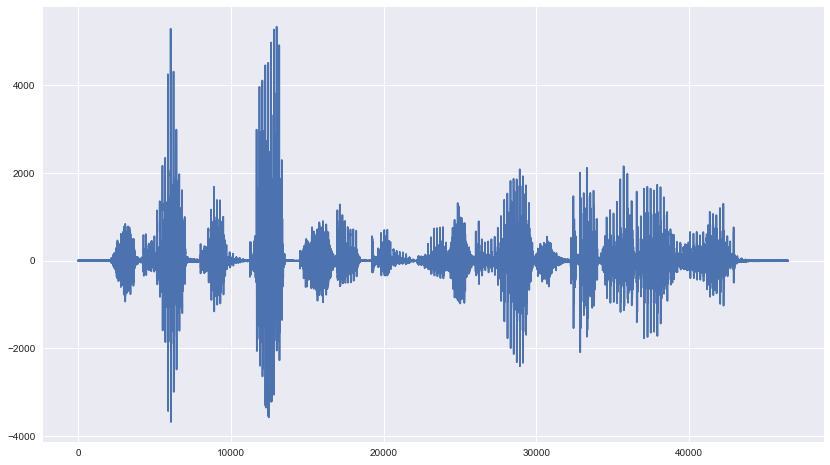

In [13]:
plt.figure(figsize=(14,8))
plt.plot(np.linspace(0,len(samples),len(samples)),samples) 
#np.linspace(): set up 3rd argument to sample_rate,otherwise default=50
plt.show()

# 2. Frame segmentation

**Reason of Frame**  : the samples can be divided into frames because that on short time scales the audio signal doesn't change much (when we say it doesn't change, we mean statistically i.e. statistically stationary, obviously the samples are constantly changing on even short time scales).

if the frame size is too short, we can't get reliable spectral estimate, if too large, signal changed too much in one frame

In [14]:
t_feed=10 #feed time
t_frame=20 #frame time
fs=sample_rate/1000 #sample_rate of each ms
L_value=np.int(fs*t_frame)
L_value

320

In [15]:
def frame_segment(samples):
    K_value=np.int((len(samples)-L_value)/(fs*t_feed))+1 #calculate the number of frames
    frame_set=[]
    for k in range(K_value):
        frame_set.append(samples[k*np.int(fs*t_feed):k*np.int(fs*t_feed)+L_value])#[0,n] contains 0~n-1
    return frame_set,K_value

In [16]:
frame_set,K_value=frame_segment(samples)

In [17]:
K_value

289

In [18]:
len(frame_set[0])

320

# 3. Voice activity detection

## Step 1:

try to figure out the noise signal power from the mixed signal power

In [19]:
mixed_power_set=[]
for k in range(K_value):
    if np.sum(np.float64((frame_set[k]))**2)<0:
        print(k)
    mixed_power_set.append(1/(L_value)*np.sum((np.float64(frame_set[k]))**2))#use np.float64 to avoid overflow encountered in long scalars

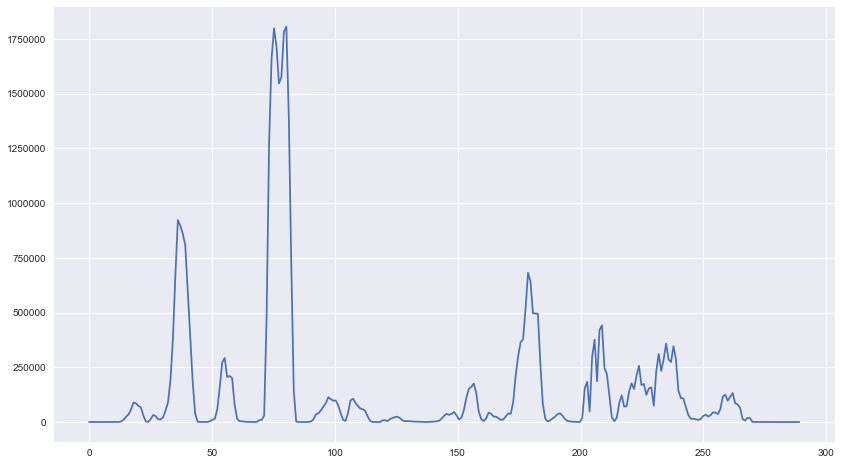

In [20]:
plt.figure(figsize=(14,8))
plt.plot(np.linspace(0,len(mixed_power_set),len(mixed_power_set)),mixed_power_set) 
#np.linspace(): set up 3rd argument to sample_rate,otherwise default=50
plt.show()

In [21]:
len(mixed_power_set)

289

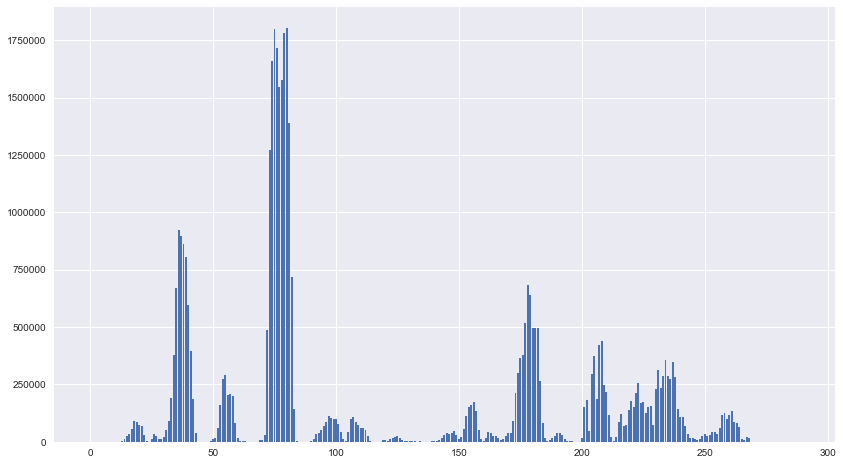

In [22]:
plt.figure(figsize=(14,8))
plt.bar(range(K_value),mixed_power_set)  #plt,bar(index,height(value))
plt.show()

## Step 2:

drop first $t_{n}$ samples becasue of silence

In [23]:
t_n=100
K_drop=np.int((t_n/t_feed)-1)

In [24]:
no_speech_set=frame_set[:K_drop]
noise_power_set=(1/K_drop)*np.sum(no_speech_set)

## Step 3

try to find a $\gamma$ as the threshold to satisfied that :
$$P(k)\lessgtr\gamma * P_{N}$$, only the frames containing speech should be used to train the classification model

In [25]:
gamma=2.0
mixed_power_set=pd.Series(mixed_power_set)

In [26]:
train_power_set=mixed_power_set.loc[mixed_power_set>gamma*noise_power_set]
train_power_set

13       2535.984375
14      10788.109375
15      24249.515625
16      35166.484375
17      56901.896875
18      89139.062500
19      85787.921875
20      73581.484375
21      67041.318750
22      29784.571875
23       2651.453125
24        780.659375
25      13694.181250
26      32237.650000
27      27101.337500
28      12142.450000
29      11854.475000
30      21730.837500
31      51603.331250
32      89709.753125
33     190800.581250
34     379672.187500
35     671679.500000
36     922163.137500
37     896364.087500
38     860401.534375
39     807384.337500
40     597829.812500
41     394316.618750
42     187153.278125
           ...      
240    109057.771875
241    107998.693750
242     68126.818750
243     32658.093750
244     14645.128125
245     15067.168750
246     12234.112500
247      9902.543750
248     13337.190625
249     26861.653125
250     34009.721875
251     25351.009375
252     30687.800000
253     43977.371875
254     43136.750000
255     36044.006250
256     59377

In [27]:
train_frame_set=[]
for index in train_power_set.index:
    train_frame_set.append(frame_set[index])

In [28]:
train_frame_set=np.array(train_frame_set)
train_frame_set.shape

(240, 320)

# 4. Feature extraction

The next step is to calculate the power spectrum of each frame. This is motivated by the human cochlea (an organ in the ear) which vibrates at different spots depending on the frequency of the incoming sounds. 

**Window**

we use Von_Hann_Fester to minimize the effect 

In [121]:
def window_func(train_frame_set):
    window = np.hanning(len(train_frame_set[0]))
    #window = np.hamming(len(train_frame_set[0]))
    train_frame_set=np.float64(train_frame_set)
    frame_windowed_set=np.multiply(train_frame_set,window) # apply the window to the frames
    #using np.multiply , multipy by elements
    return frame_windowed_set


In [122]:
train_frame_set=np.float64(train_frame_set)

we plot the hanning window and see

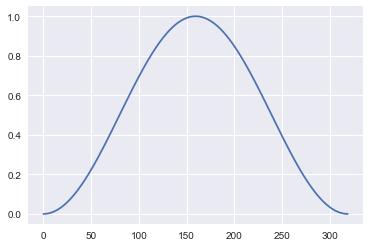

In [123]:
plt.plot(range(len(train_frame_set[0])),window)
plt.show()

In [125]:
frame_windowed_set= window_func(train_frame_set)

In [126]:
len(frame_windowed_set)

240

In [127]:
frame_windowed_set.shape

(240, 320)

In [128]:
sample_frame =frame_windowed_set[0]

** Fourier-Transform and Power Spectrum**

When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.

We would generally perform a 512 point FFT and keep oly the first 257 coefficents.

In [130]:
NFFT=512
#mag_frames = np.absolute(np.fft.rfft(sample_frame, NFFT))  # Magnitude of the FFT
#mag_frames = np.absolute(np.fft.fft(sample_frame, NFFT))
def Flourier_transfer(frame_windowed_set,NFFT):
    mag_frames = np.absolute(np.fft.rfft(frame_windowed_set, NFFT)) 
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2)) 
    return pow_frames,mag_frames

In [131]:
pow_frames,mag_frames=Flourier_transfer(frame_windowed_set,NFFT)

In [132]:
pow_frames.shape

(240, 257)

**Mel Scale Function**

In [106]:
def Mel_scale(freq_orig):
    if freq_orig <= 1000:
        f_mel = freq_orig
    else:
        f_mel = 2595 * np.log10(1 + (freq_orig/2) / 700)
    return f_mel

** Mel Scale Inverse Function**

In [111]:
def Mel_scale_inv(f_mel):
    f_orig = 700 * (10**(f_mel / 2595) - 1)
    return f_orig

In [135]:

#sample_rate=16000
nfilt = 22
def mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt):
    low_freq_mel = 0
    #(sample_rate/2)??? because of rfft?
    high_freq_mel = Mel_scale(sample_rate)  # Convert Hz to Mel #Mel Scale function 
    # nfilt + 2: add the boundary points
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = Mel_scale_inv(mel_points)  # Convert Mel to Hz  # Power Spectrum # Inverse function
    bins = np.floor((NFFT + 1) * hz_points / sample_rate)
    # fbank = Figure 3.9 22 triangular filter set
    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bins[m - 1])   # left
        f_m = int(bins[m])             # center
        f_m_plus = int(bins[m + 1])    # right
        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    #filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability #np.where: return the index of filter_banks == 0
    #filter_banks = 20 * np.log10(filter_banks)  # dB
    return filter_banks

then we plot the mel filter bank and see

In [136]:
filter_banks=mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt)

In [138]:
filter_banks

array([[  1.04044650e+02,   1.13054879e+02,   6.09772279e+01, ...,
          2.43846991e+03,   1.08292807e+03,   5.55356385e+02],
       [  1.02450745e+02,   2.14822648e+02,   5.73588576e+02, ...,
          9.99132340e+03,   2.86404223e+03,   3.78712282e+03],
       [  3.81105557e+01,   3.57349991e+02,   8.30454585e+02, ...,
          1.53947042e+04,   1.66323020e+04,   7.85259893e+03],
       ..., 
       [  2.98079186e+04,   4.59940276e+04,   2.11617607e+04, ...,
          6.06170806e+02,   6.66222237e+01,   1.38548957e+01],
       [  8.57709681e+03,   9.97117041e+03,   5.84625340e+03, ...,
          1.78177957e+02,   8.09750107e+01,   1.08213957e+01],
       [  8.87201602e+03,   8.32739138e+03,   3.66251509e+03, ...,
          1.14536486e+02,   3.95728957e+01,   1.40493371e+01]])

In [139]:
fbank.shape

(22, 257)

In [140]:
def mel_plot(fbank):
    plt.figure(figsize=(14,8))
    plt.title("mel-filter-bank",size=30)
    plt.xlabel("frequency",size=20)
    plt.ylabel("Amplitude",size=20)
    for i in range(fbank.shape[0]):
        plt.plot(range(fbank.shape[1]),fbank[i])
    plt.show()

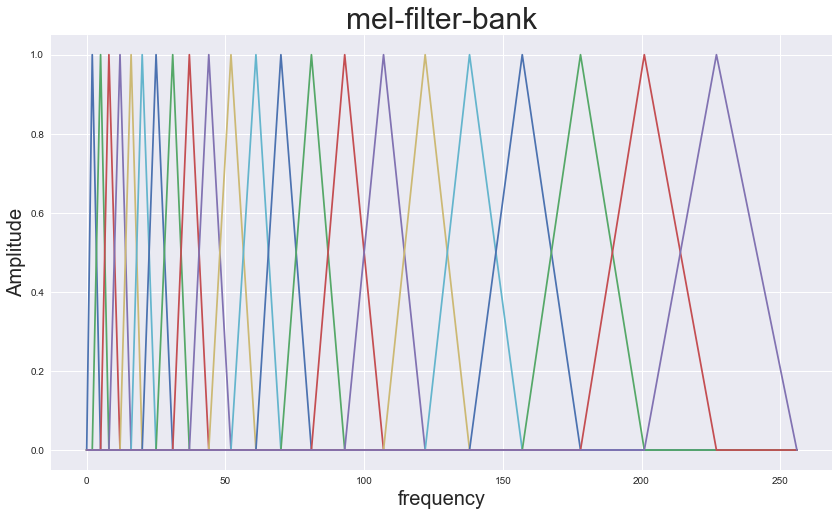

In [141]:
mel_plot(fbank)

In [142]:
filter_banks=filter_banks.T

In [143]:
filter_banks

array([[  1.04044650e+02,   1.02450745e+02,   3.81105557e+01, ...,
          2.98079186e+04,   8.57709681e+03,   8.87201602e+03],
       [  1.13054879e+02,   2.14822648e+02,   3.57349991e+02, ...,
          4.59940276e+04,   9.97117041e+03,   8.32739138e+03],
       [  6.09772279e+01,   5.73588576e+02,   8.30454585e+02, ...,
          2.11617607e+04,   5.84625340e+03,   3.66251509e+03],
       ..., 
       [  2.43846991e+03,   9.99132340e+03,   1.53947042e+04, ...,
          6.06170806e+02,   1.78177957e+02,   1.14536486e+02],
       [  1.08292807e+03,   2.86404223e+03,   1.66323020e+04, ...,
          6.66222237e+01,   8.09750107e+01,   3.95728957e+01],
       [  5.55356385e+02,   3.78712282e+03,   7.85259893e+03, ...,
          1.38548957e+01,   1.08213957e+01,   1.40493371e+01]])

calculate the feature vectore $\underline{b}$ using DCT

In [145]:
num_features = 15 
#b_n = np.zeros((num_features,303))
#train_frame_set = (303,320)

def DCT(Y,num_features):
    b_n =0
    b_set=[]
    for n_value in range(num_features):    
        for m in range(Y.shape[0]):
            b_n=np.around(np.log10(Y[m]))*np.cos(np.around(math.pi*n_value*(m-0.5)/(Y.shape[0])))
        b_set.append(b_n)
    b_set=np.array(b_set)
    return b_set

In [146]:
b_new = DCT(filter_banks,num_features)
b_new.shape

(15, 240)

In [147]:
#num_ceps = 12
#num_ceps = 15  # 15 features
#cep_lifter = 22
#mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
#(nframes, ncoeff) = mfcc.shape
#n = np.arange(ncoeff)
#lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
#mfcc *= lift  #*

In [148]:
#mfcc.shape

In [149]:
#mfcc[:,1]

In [150]:
#ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)

In [151]:
ubm_dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'var', 'K', 'weights', 'D', 'means'])

In [152]:
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights']

In [153]:
ubm_means.shape

(49, 15)

In [154]:
#test on one frame
sample_frame=b_new[:,0]

In [155]:
sample_frame.shape
b_new
min(b_new.ravel())

-5.9399549796026729

# 5. Probabilistic model of speech

## 5.1: Universal Background Model

naive GMM-UBM --**ubm_value_set:**$$P_{UBM}(\underline{b})=\sum_{k=1}^{K}\omega_{UBM,k}*p(\underline{b}|\underline{\mu}_{UBM,k},C_{UBM,k})$$

In [156]:
K_value=ubm_var.shape[0] #number of naive models
T_value=b_new.shape[1] #number of frames

In [298]:
#calculate the naive GMM-UBM
def naive_G_U(b_new,ubm_means,ubm_var,ubm_weights):
    ubm_value_set=[]
    for t in range(T_value): 
        prob_ubm=[]
        for i in range(K_value):
            ubm_pdf=multivariate_normal.pdf(b_new[:,t],ubm_means[i,:],ubm_var[i,:])
            prob_ubm.append(ubm_pdf)
        prob_ubm=np.array(prob_ubm)
        print(prob_ubm)
        ubm_value = np.dot(ubm_weights,prob_ubm)
        #ubm_value = np.dot(ubm_weights,prob_ubm).flatten()
        ubm_value_set.append(ubm_value)
    ubm_value_set=np.array(ubm_value_set)
    return ubm_value_set

In [ ]:
#pdf calculate
1/(2*math.pi*cov*ubm_var[i,:])

In [299]:
np.diag(ubm_var[1,:])[3,3]

3.5625335952901471

In [300]:
multivariate_normal.pdf(b_new[:,1],ubm_means[1,:],ubm_var[1,:])

2.0500406347511454e-33

In [301]:
b_new.shape

(15, 240)

In [302]:
ubm_var.shape

(49, 15)

In [303]:
ubm_value_set=naive_G_U(b_new,ubm_means,ubm_var,ubm_weights)

[  1.63978867e-26   2.85196717e-26   4.79381635e-29   1.82828707e-29
   4.53379026e-25   3.13143020e-22   8.19170551e-25   4.31772574e-25
   7.98283385e-29   3.68943827e-28   3.28338463e-18   5.48051315e-23
   1.14317725e-21   2.93792908e-18   4.36400114e-19   3.31115353e-29
   4.34523471e-19   2.39194473e-29   6.44129044e-23   6.95603500e-19
   6.98175495e-28   4.51538312e-26   1.03087639e-31   3.22325568e-24
   8.02114206e-20   1.52797744e-29   3.46915075e-20   3.80787410e-25
   1.20522291e-23   1.06904508e-22   2.36790035e-28   4.25680142e-31
   2.26519790e-24   6.76654042e-23   4.09473562e-26   1.74599669e-30
   1.86468832e-21   2.65647703e-27   1.44078428e-30   3.51050441e-25
   4.12090150e-22   2.92791151e-20   3.68094404e-26   1.62712657e-20
   3.84324483e-36   7.71898585e-20   2.74674576e-22   1.62222028e-18
   7.85540269e-21]
[  2.05263838e-36   2.05004063e-33   6.88432009e-37   2.47535818e-37
   9.84095999e-37   4.19793270e-29   8.22306417e-31   1.03932772e-31
   8.68633279e-

[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-24   5.29648437e-21   1.21802420e-15   9.56376436e-19
   1.98702697e-16   1.85160617e-15   2.43573816e-16   1.62815326e-21
   1.19017948e-14   3.74908641e-24   5.87940525e-20   8.73903157e-16
   2.14647683e-23   2.58270796e-16   6.15184157e-27   4.73581104e-20
   7.33369678e-17   3.61945450e-22   6.84725908e-17   1.15032906e-18
   1.57859872e-19   5.06353649e-20   4.32021213e-23   2.86875592e-26
   5.17229925e-18   2.82548072e-16   8.31414410e-22   2.34941345e-25
   1.81625248e-18   6.65806908e-24   3.78846492e-26   8.39005317e-20
   4.14874409e-18   4.92691012e-18   4.42048703e-21   3.88908130e-15
   4.31608623e-26   1.04735552e-14   9.32126115e-19   1.18035778e-14
   1.38081843e-15]
[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-

[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-24   5.29648437e-21   1.21802420e-15   9.56376436e-19
   1.98702697e-16   1.85160617e-15   2.43573816e-16   1.62815326e-21
   1.19017948e-14   3.74908641e-24   5.87940525e-20   8.73903157e-16
   2.14647683e-23   2.58270796e-16   6.15184157e-27   4.73581104e-20
   7.33369678e-17   3.61945450e-22   6.84725908e-17   1.15032906e-18
   1.57859872e-19   5.06353649e-20   4.32021213e-23   2.86875592e-26
   5.17229925e-18   2.82548072e-16   8.31414410e-22   2.34941345e-25
   1.81625248e-18   6.65806908e-24   3.78846492e-26   8.39005317e-20
   4.14874409e-18   4.92691012e-18   4.42048703e-21   3.88908130e-15
   4.31608623e-26   1.04735552e-14   9.32126115e-19   1.18035778e-14
   1.38081843e-15]
[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-

[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-24   5.29648437e-21   1.21802420e-15   9.56376436e-19
   1.98702697e-16   1.85160617e-15   2.43573816e-16   1.62815326e-21
   1.19017948e-14   3.74908641e-24   5.87940525e-20   8.73903157e-16
   2.14647683e-23   2.58270796e-16   6.15184157e-27   4.73581104e-20
   7.33369678e-17   3.61945450e-22   6.84725908e-17   1.15032906e-18
   1.57859872e-19   5.06353649e-20   4.32021213e-23   2.86875592e-26
   5.17229925e-18   2.82548072e-16   8.31414410e-22   2.34941345e-25
   1.81625248e-18   6.65806908e-24   3.78846492e-26   8.39005317e-20
   4.14874409e-18   4.92691012e-18   4.42048703e-21   3.88908130e-15
   4.31608623e-26   1.04735552e-14   9.32126115e-19   1.18035778e-14
   1.38081843e-15]
[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-

[  2.64007630e-15   6.52462079e-19   4.21414591e-20   1.28460087e-20
   8.50730965e-12   1.28352586e-14   2.15080575e-18   1.18060878e-17
   3.36939107e-21   7.43656887e-17   3.24030361e-14   1.89739968e-16
   2.00179042e-13   5.78372505e-14   1.79214975e-15   7.36948783e-17
   4.30818615e-12   3.80226854e-21   1.67350623e-18   9.29177933e-15
   5.62460551e-21   1.69994688e-10   2.44356403e-24   2.53334864e-18
   1.02056854e-15   1.45544086e-17   4.27059789e-15   5.32496981e-15
   1.95600391e-17   2.70145466e-19   2.80763183e-20   1.89678838e-23
   2.97715194e-14   2.61379150e-12   1.70354238e-19   9.47141218e-23
   4.33269974e-17   3.01403027e-22   9.17861980e-24   1.35555547e-16
   2.32203181e-16   5.50288473e-17   3.63411800e-18   5.56982437e-12
   2.90088075e-19   8.57074808e-12   8.03491945e-17   2.35928900e-12
   1.79419332e-12]
[  2.64007630e-15   6.52462079e-19   4.21414591e-20   1.28460087e-20
   8.50730965e-12   1.28352586e-14   2.15080575e-18   1.18060878e-17
   3.36939107e-

[  3.49781027e-49   7.23207022e-43   5.59546973e-47   1.69252630e-47
   9.51570872e-52   5.08249931e-38   1.14167251e-38   2.91652202e-40
   7.50067239e-45   1.67485704e-51   8.79914228e-27   2.64467846e-37
   7.36727965e-39   9.00496054e-28   3.20912931e-30   1.06813355e-53
   1.33678990e-33   2.63773765e-46   2.34451019e-33   2.67153424e-31
   4.57355789e-43   2.10315496e-57   8.53629864e-48   7.20607035e-40
   3.38345319e-31   1.33211082e-52   2.80977143e-31   1.50130940e-46
   5.94756847e-38   6.80985119e-34   3.21484787e-46   8.85132289e-47
   6.95938318e-45   4.21962764e-44   1.02064249e-40   2.59315874e-48
   2.88737719e-32   2.49168331e-39   1.63012069e-45   1.89867801e-42
   6.98593793e-37   3.02358241e-28   8.18825581e-43   6.12740161e-38
   6.53216336e-66   9.19739100e-37   3.90893056e-34   6.35174517e-31
   1.02689452e-37]
[  3.49781027e-49   7.23207022e-43   5.59546973e-47   1.69252630e-47
   9.51570872e-52   5.08249931e-38   1.14167251e-38   2.91652202e-40
   7.50067239e-

[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-24   5.29648437e-21   1.21802420e-15   9.56376436e-19
   1.98702697e-16   1.85160617e-15   2.43573816e-16   1.62815326e-21
   1.19017948e-14   3.74908641e-24   5.87940525e-20   8.73903157e-16
   2.14647683e-23   2.58270796e-16   6.15184157e-27   4.73581104e-20
   7.33369678e-17   3.61945450e-22   6.84725908e-17   1.15032906e-18
   1.57859872e-19   5.06353649e-20   4.32021213e-23   2.86875592e-26
   5.17229925e-18   2.82548072e-16   8.31414410e-22   2.34941345e-25
   1.81625248e-18   6.65806908e-24   3.78846492e-26   8.39005317e-20
   4.14874409e-18   4.92691012e-18   4.42048703e-21   3.88908130e-15
   4.31608623e-26   1.04735552e-14   9.32126115e-19   1.18035778e-14
   1.38081843e-15]
[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-

   1.38081843e-15]
[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-24   5.29648437e-21   1.21802420e-15   9.56376436e-19
   1.98702697e-16   1.85160617e-15   2.43573816e-16   1.62815326e-21
   1.19017948e-14   3.74908641e-24   5.87940525e-20   8.73903157e-16
   2.14647683e-23   2.58270796e-16   6.15184157e-27   4.73581104e-20
   7.33369678e-17   3.61945450e-22   6.84725908e-17   1.15032906e-18
   1.57859872e-19   5.06353649e-20   4.32021213e-23   2.86875592e-26
   5.17229925e-18   2.82548072e-16   8.31414410e-22   2.34941345e-25
   1.81625248e-18   6.65806908e-24   3.78846492e-26   8.39005317e-20
   4.14874409e-18   4.92691012e-18   4.42048703e-21   3.88908130e-15
   4.31608623e-26   1.04735552e-14   9.32126115e-19   1.18035778e-14
   1.38081843e-15]
[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e

[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-24   5.29648437e-21   1.21802420e-15   9.56376436e-19
   1.98702697e-16   1.85160617e-15   2.43573816e-16   1.62815326e-21
   1.19017948e-14   3.74908641e-24   5.87940525e-20   8.73903157e-16
   2.14647683e-23   2.58270796e-16   6.15184157e-27   4.73581104e-20
   7.33369678e-17   3.61945450e-22   6.84725908e-17   1.15032906e-18
   1.57859872e-19   5.06353649e-20   4.32021213e-23   2.86875592e-26
   5.17229925e-18   2.82548072e-16   8.31414410e-22   2.34941345e-25
   1.81625248e-18   6.65806908e-24   3.78846492e-26   8.39005317e-20
   4.14874409e-18   4.92691012e-18   4.42048703e-21   3.88908130e-15
   4.31608623e-26   1.04735552e-14   9.32126115e-19   1.18035778e-14
   1.38081843e-15]
[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-

   1.02689452e-37]
[  3.49781027e-49   7.23207022e-43   5.59546973e-47   1.69252630e-47
   9.51570872e-52   5.08249931e-38   1.14167251e-38   2.91652202e-40
   7.50067239e-45   1.67485704e-51   8.79914228e-27   2.64467846e-37
   7.36727965e-39   9.00496054e-28   3.20912931e-30   1.06813355e-53
   1.33678990e-33   2.63773765e-46   2.34451019e-33   2.67153424e-31
   4.57355789e-43   2.10315496e-57   8.53629864e-48   7.20607035e-40
   3.38345319e-31   1.33211082e-52   2.80977143e-31   1.50130940e-46
   5.94756847e-38   6.80985119e-34   3.21484787e-46   8.85132289e-47
   6.95938318e-45   4.21962764e-44   1.02064249e-40   2.59315874e-48
   2.88737719e-32   2.49168331e-39   1.63012069e-45   1.89867801e-42
   6.98593793e-37   3.02358241e-28   8.18825581e-43   6.12740161e-38
   6.53216336e-66   9.19739100e-37   3.90893056e-34   6.35174517e-31
   1.02689452e-37]
[  2.05263838e-36   2.05004063e-33   6.88432009e-37   2.47535818e-37
   9.84095999e-37   4.19793270e-29   8.22306417e-31   1.03932772e

   1.38081843e-15]
[  1.63978867e-26   2.85196717e-26   4.79381635e-29   1.82828707e-29
   4.53379026e-25   3.13143020e-22   8.19170551e-25   4.31772574e-25
   7.98283385e-29   3.68943827e-28   3.28338463e-18   5.48051315e-23
   1.14317725e-21   2.93792908e-18   4.36400114e-19   3.31115353e-29
   4.34523471e-19   2.39194473e-29   6.44129044e-23   6.95603500e-19
   6.98175495e-28   4.51538312e-26   1.03087639e-31   3.22325568e-24
   8.02114206e-20   1.52797744e-29   3.46915075e-20   3.80787410e-25
   1.20522291e-23   1.06904508e-22   2.36790035e-28   4.25680142e-31
   2.26519790e-24   6.76654042e-23   4.09473562e-26   1.74599669e-30
   1.86468832e-21   2.65647703e-27   1.44078428e-30   3.51050441e-25
   4.12090150e-22   2.92791151e-20   3.68094404e-26   1.62712657e-20
   3.84324483e-36   7.71898585e-20   2.74674576e-22   1.62222028e-18
   7.85540269e-21]
[  2.64007630e-15   6.52462079e-19   4.21414591e-20   1.28460087e-20
   8.50730965e-12   1.28352586e-14   2.15080575e-18   1.18060878e

[  2.05263838e-36   2.05004063e-33   6.88432009e-37   2.47535818e-37
   9.84095999e-37   4.19793270e-29   8.22306417e-31   1.03932772e-31
   8.68633279e-36   2.51356583e-38   6.34721537e-22   3.57055637e-29
   3.81195738e-29   2.31039218e-22   1.03071136e-23   6.19854002e-40
   2.09650936e-25   9.87460781e-37   2.20062373e-27   4.68591317e-24
   1.93556277e-34   9.08433754e-40   1.14981529e-38   7.98722895e-31
   1.33530953e-24   1.09500479e-39   5.55402610e-25   1.93151737e-34
   8.70475621e-30   2.54228312e-27   4.62290753e-36   6.19709640e-38
   2.50073987e-33   3.58999580e-32   2.03506319e-32   3.88746627e-38
   4.68865940e-26   1.91434811e-32   5.04875689e-37   9.92959936e-33
   2.27559476e-28   1.15488924e-23   2.09829386e-33   4.07910087e-28
   2.04811196e-49   3.43097130e-27   2.05595162e-27   6.12448574e-24
   3.30342822e-28]
[  3.49781027e-49   7.23207022e-43   5.59546973e-47   1.69252630e-47
   9.51570872e-52   5.08249931e-38   1.14167251e-38   2.91652202e-40
   7.50067239e-

   1.38081843e-15]
[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-24   5.29648437e-21   1.21802420e-15   9.56376436e-19
   1.98702697e-16   1.85160617e-15   2.43573816e-16   1.62815326e-21
   1.19017948e-14   3.74908641e-24   5.87940525e-20   8.73903157e-16
   2.14647683e-23   2.58270796e-16   6.15184157e-27   4.73581104e-20
   7.33369678e-17   3.61945450e-22   6.84725908e-17   1.15032906e-18
   1.57859872e-19   5.06353649e-20   4.32021213e-23   2.86875592e-26
   5.17229925e-18   2.82548072e-16   8.31414410e-22   2.34941345e-25
   1.81625248e-18   6.65806908e-24   3.78846492e-26   8.39005317e-20
   4.14874409e-18   4.92691012e-18   4.42048703e-21   3.88908130e-15
   4.31608623e-26   1.04735552e-14   9.32126115e-19   1.18035778e-14
   1.38081843e-15]
[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e

[  2.64007630e-15   6.52462079e-19   4.21414591e-20   1.28460087e-20
   8.50730965e-12   1.28352586e-14   2.15080575e-18   1.18060878e-17
   3.36939107e-21   7.43656887e-17   3.24030361e-14   1.89739968e-16
   2.00179042e-13   5.78372505e-14   1.79214975e-15   7.36948783e-17
   4.30818615e-12   3.80226854e-21   1.67350623e-18   9.29177933e-15
   5.62460551e-21   1.69994688e-10   2.44356403e-24   2.53334864e-18
   1.02056854e-15   1.45544086e-17   4.27059789e-15   5.32496981e-15
   1.95600391e-17   2.70145466e-19   2.80763183e-20   1.89678838e-23
   2.97715194e-14   2.61379150e-12   1.70354238e-19   9.47141218e-23
   4.33269974e-17   3.01403027e-22   9.17861980e-24   1.35555547e-16
   2.32203181e-16   5.50288473e-17   3.63411800e-18   5.56982437e-12
   2.90088075e-19   8.57074808e-12   8.03491945e-17   2.35928900e-12
   1.79419332e-12]
[  2.64007630e-15   6.52462079e-19   4.21414591e-20   1.28460087e-20
   8.50730965e-12   1.28352586e-14   2.15080575e-18   1.18060878e-17
   3.36939107e-

[  2.64007630e-15   6.52462079e-19   4.21414591e-20   1.28460087e-20
   8.50730965e-12   1.28352586e-14   2.15080575e-18   1.18060878e-17
   3.36939107e-21   7.43656887e-17   3.24030361e-14   1.89739968e-16
   2.00179042e-13   5.78372505e-14   1.79214975e-15   7.36948783e-17
   4.30818615e-12   3.80226854e-21   1.67350623e-18   9.29177933e-15
   5.62460551e-21   1.69994688e-10   2.44356403e-24   2.53334864e-18
   1.02056854e-15   1.45544086e-17   4.27059789e-15   5.32496981e-15
   1.95600391e-17   2.70145466e-19   2.80763183e-20   1.89678838e-23
   2.97715194e-14   2.61379150e-12   1.70354238e-19   9.47141218e-23
   4.33269974e-17   3.01403027e-22   9.17861980e-24   1.35555547e-16
   2.32203181e-16   5.50288473e-17   3.63411800e-18   5.56982437e-12
   2.90088075e-19   8.57074808e-12   8.03491945e-17   2.35928900e-12
   1.79419332e-12]
[  2.64007630e-15   6.52462079e-19   4.21414591e-20   1.28460087e-20
   8.50730965e-12   1.28352586e-14   2.15080575e-18   1.18060878e-17
   3.36939107e-

[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-24   5.29648437e-21   1.21802420e-15   9.56376436e-19
   1.98702697e-16   1.85160617e-15   2.43573816e-16   1.62815326e-21
   1.19017948e-14   3.74908641e-24   5.87940525e-20   8.73903157e-16
   2.14647683e-23   2.58270796e-16   6.15184157e-27   4.73581104e-20
   7.33369678e-17   3.61945450e-22   6.84725908e-17   1.15032906e-18
   1.57859872e-19   5.06353649e-20   4.32021213e-23   2.86875592e-26
   5.17229925e-18   2.82548072e-16   8.31414410e-22   2.34941345e-25
   1.81625248e-18   6.65806908e-24   3.78846492e-26   8.39005317e-20
   4.14874409e-18   4.92691012e-18   4.42048703e-21   3.88908130e-15
   4.31608623e-26   1.04735552e-14   9.32126115e-19   1.18035778e-14
   1.38081843e-15]
[  1.78329240e-19   1.94719206e-21   1.88928538e-23   6.81952995e-24
   9.30492800e-17   2.10959516e-17   1.12866095e-20   2.09109077e-20
   5.82186426e-

[  2.64007630e-15   6.52462079e-19   4.21414591e-20   1.28460087e-20
   8.50730965e-12   1.28352586e-14   2.15080575e-18   1.18060878e-17
   3.36939107e-21   7.43656887e-17   3.24030361e-14   1.89739968e-16
   2.00179042e-13   5.78372505e-14   1.79214975e-15   7.36948783e-17
   4.30818615e-12   3.80226854e-21   1.67350623e-18   9.29177933e-15
   5.62460551e-21   1.69994688e-10   2.44356403e-24   2.53334864e-18
   1.02056854e-15   1.45544086e-17   4.27059789e-15   5.32496981e-15
   1.95600391e-17   2.70145466e-19   2.80763183e-20   1.89678838e-23
   2.97715194e-14   2.61379150e-12   1.70354238e-19   9.47141218e-23
   4.33269974e-17   3.01403027e-22   9.17861980e-24   1.35555547e-16
   2.32203181e-16   5.50288473e-17   3.63411800e-18   5.56982437e-12
   2.90088075e-19   8.57074808e-12   8.03491945e-17   2.35928900e-12
   1.79419332e-12]
[  2.64007630e-15   6.52462079e-19   4.21414591e-20   1.28460087e-20
   8.50730965e-12   1.28352586e-14   2.15080575e-18   1.18060878e-17
   3.36939107e-

In [304]:
ubm_value_set.shape

(240, 1)

In [305]:
ubm_value_set.shape

(240, 1)

In [307]:
ubm_value_set.shape

(240, 1)

## 5.2 Speaker models adaption

GMM model for a particular speaker with his training data is adapted from the UBM-GMM in equation by modifying the parameters $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$,first we calcualte the posteriori probability $$p=\frac{a}{b},1\leq t\leq T$$

### 5.2.1 posteriori probability

In [161]:
def post_prob_model(ubm_weights,ubm_means,ubm_var,ubm_value_set):
    model_set=[] #include 49 models
    for k in range(K_value):
        frame_set=[] #include number of frames
        for t in range(T_value):
            frame_set.append(ubm_weights[:,k]*norm.pdf(b_new[:,t],ubm_means[k,:],ubm_var[k,:])/ubm_value_set[t,:])
        frame_set=np.array(frame_set)
        model_set.append(frame_set)
    model_set=np.array(model_set)
    return model_set

In [162]:
model_set=post_prob_model(ubm_weights,ubm_means,ubm_var,ubm_value_set)

In [163]:
model_set.shape

(49, 240, 15)

### 5.2.2 Mean

In [164]:
def mu_model(model_set,b_new):
    value_temp=[]
    for t in range(model_set.shape[1]):
        value_temp.append(np.dot(model_set[:,t,:],b_new[:,t]))
    value_temp=np.array(value_temp)
    sum_value = np.sum(value_temp,axis=0)
    mu_ubm=np.multiply((1/np.sum(model_set,axis=1)).T,sum_value)
    return mu_ubm.T

In [165]:
mu_ubm=mu_model(model_set,b_new)

In [167]:
mu_ubm

array([[  2.07728646e+00,   8.55608839e-01,   6.93023947e-01,
          6.49172144e-01,   8.07282293e-01,   1.11898700e+00,
          1.74630274e+00,   7.82168196e-01,   1.09322537e+00,
          1.40544879e+00,   1.78187136e+00,   1.54854642e+00,
          2.24495133e+00,   1.82886934e+00,   2.59775471e+00],
       [ -1.13222531e+00,  -1.03076032e+00,  -1.20649164e+00,
         -7.82245917e-01,  -1.95907682e+00,  -1.03906683e+00,
         -5.30117449e+00,  -9.42440612e-01,  -1.26801370e+00,
         -7.91860218e-01,  -1.09643151e+00,  -1.87910083e+00,
         -5.94197794e+01,  -1.16226488e+00,  -6.65489447e-01],
       [ -2.01919943e-01,  -4.20126603e-01,  -1.33797418e+00,
         -4.86197091e-01,  -1.19146026e+00,  -5.36049427e-01,
         -9.45753060e-01,  -3.97541231e-01,  -5.90149788e-01,
         -6.79898560e-01,  -7.74089549e-01,  -1.01989292e+01,
         -4.42568084e-01,  -1.05678447e+00,  -9.39961882e-01],
       [  3.50932840e+00,   2.07924865e+00,   2.74432695e+00,
     

In [169]:
#test calculate on the k= 0 (one naive model)
k=0
sum_value=0
for t in range(model_set.shape[1]):
    tmp=np.dot(model_set[k,t,:],b_new[:,t])
    sum_value +=tmp
mu=sum_value/np.sum(model_set[k,:,:],axis=0)
mu

array([ 2.07728646,  0.85560884,  0.69302395,  0.64917214,  0.80728229,
        1.118987  ,  1.74630274,  0.7821682 ,  1.09322537,  1.40544879,
        1.78187136,  1.54854642,  2.24495133,  1.82886934,  2.59775471])

In [202]:
np.dot(mu_ubm[0,:],mu_ubm[0,:])

35.390477724125731

### 5.2.3 Covariance

In [203]:
def cov_model(model_set,b_new,mu_ubm):
    value_temp=[]
    cov_set=[]
    for t in range(T_value):
        value_temp.append(np.dot(model_set[:,t,:],np.dot(b_new[:,t],b_new[:,t].T)))
    value_temp=np.array(value_temp)
    #print(value_temp.shape)
    sum_value = np.sum(value_temp,axis=0)
    weight_temp=1/np.sum(model_set,axis=1)
    for k in range(K_value):
        cov_ubm=np.dot(weight_temp[0,:].reshape(-1,1),sum_value[0,:].reshape(1,-1))
        cov_ubm -=np.dot(mu_ubm[k,:],mu_ubm[k,:])
        cov_set.append(cov_ubm)
    cov_set=np.array(cov_set)
    return cov_set

In [204]:
np.dot(b_new[:,1],b_new[:,1].T)

164.56853225476911

In [206]:
cov_set=cov_model(model_set,b_new,mu_ubm)

In [207]:
cov_set.shape

(49, 15, 15)

### 5.2.4 Weight 

weight of K mode

In [211]:
model_set.shape

(49, 240, 15)

In [212]:
def weight_model(model_set):
    return (1/T_value)*np.sum(model_set,axis=1)

In [213]:
weights_model=weight_model(model_set)

In [214]:
weights_model.shape

(49, 15)